{'A': {'x': 0, 'y': 5}, 'B': {'x': 10, 'y': 5}, 'v_452be1': {'x': 5.0, 'y': 5.0}}


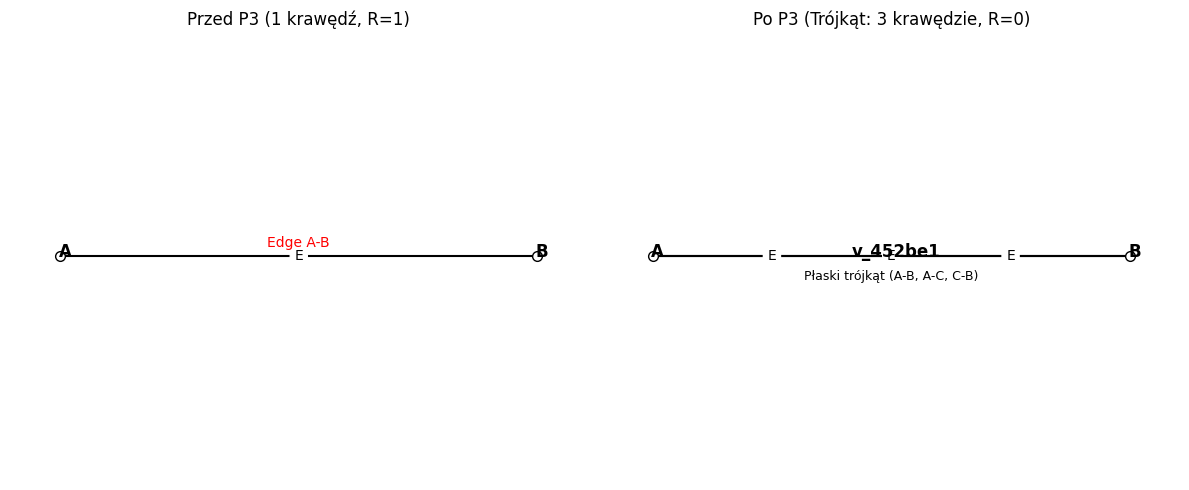

In [1]:
import matplotlib.pyplot as plt
from hypergrammar.hypergraph import Hypergraph
from hypergrammar.edge import Edge, EdgeType
from hypergrammar.productions.prod_3 import Prod3

# === KONFIGURACJA ===
graph = Hypergraph()
graph.set_vertex_parameter("A", {"x": 0, "y": 5})
graph.set_vertex_parameter("B", {"x": 10, "y": 5})

# Krawędź do zastąpienia trójkątem
e1 = Edge(EdgeType.E, frozenset(["A", "B"]), {"R": 1, "B": 0})
graph.add_edge(e1)

# === RYSOWANIE PRZED ===
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.title("Przed P3 (1 krawędź, R=1)")
graph.draw(use_positional_parameters=True)
plt.text(5, 5.2, "Edge A-B", ha='center', color='red')

# === APLIKACJA ===

prod3 = Prod3()
prod3.apply(graph)

# === RYSOWANIE PO ===
plt.subplot(1, 2, 2)
plt.title("Po P3 (Trójkąt: 3 krawędzie, R=0)")
graph.draw(use_positional_parameters=True)
print(graph._node_parameters)
# Adnotacje
# Szukamy ID nowego wierzchołka
# new_node = [k for k in graph._node_parameters if k not in ["A", "B"]][0]
# p = graph.get_vertex_parameters(new_node)
# plt.text(p['x'], p['y'] + 0.5, "Node C", ha='center', color='green', fontweight='bold')
plt.text(5, 4.5, "Płaski trójkąt (A-B, A-C, C-B)", ha='center', fontsize=9)

plt.tight_layout()
plt.show()

frozenset({Edge(type=EdgeType.E, vertices=frozenset({'v1', 'v2'}), parameters={'R': 0, 'B': 0}), Edge(type=EdgeType.E, vertices=frozenset({'v_fc47e0', 'v4'}), parameters={'R': 0, 'B': 0}), Edge(type=EdgeType.E, vertices=frozenset({'v2', 'v3'}), parameters={'R': 1}), Edge(type=EdgeType.E, vertices=frozenset({'v_fc47e0', 'v1'}), parameters={'R': 0, 'B': 0}), Edge(type=EdgeType.E, vertices=frozenset({'v4', 'v3'}), parameters={'R': 1}), Edge(type=EdgeType.Q, vertices=frozenset({'v1', 'v2', 'v4', 'v3'}), parameters={'R': 1}), Edge(type=EdgeType.E, vertices=frozenset({'v4', 'v1'}), parameters={'R': 0, 'B': 0}), Edge(type=EdgeType.E, vertices=frozenset({'v1', 'v_d8cfd4'}), parameters={'R': 0, 'B': 0}), Edge(type=EdgeType.E, vertices=frozenset({'v2', 'v_d8cfd4'}), parameters={'R': 0, 'B': 0})})


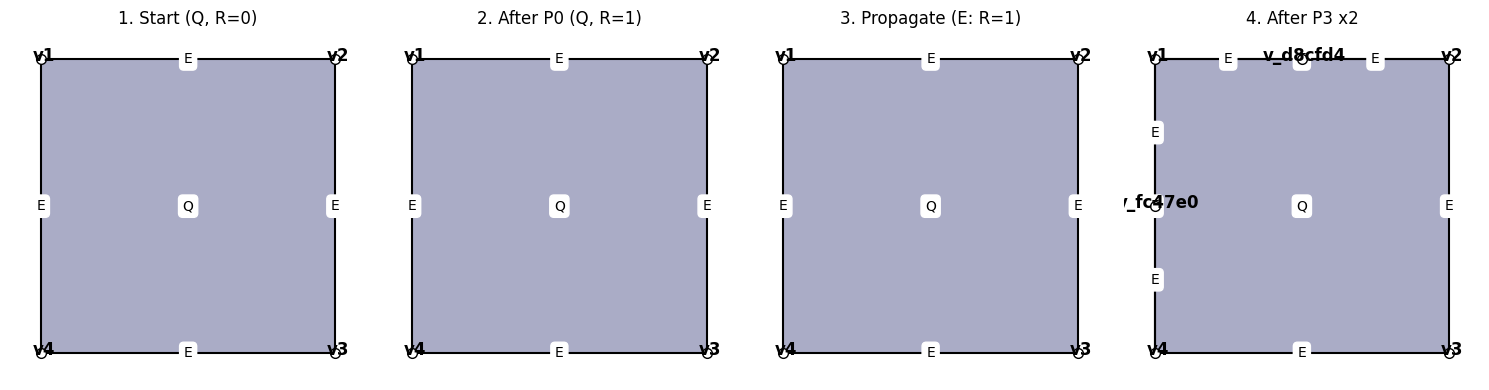

In [2]:
from hypergrammar.productions.prod_0 import Prod0

graph = Hypergraph()
nodes = {
    "v1": (0, 10), "v2": (10, 10),
    "v3": (10, 0),  "v4": (0, 0)
}
for uid, (x, y) in nodes.items():
    graph.set_vertex_parameter(uid, {"x": x, "y": y})

# Krawędzie E (obwód)
edges_e = [("v1", "v2"), ("v2", "v3"), ("v3", "v4"), ("v4", "v1")]
for idx, (u, v) in enumerate(edges_e):
    if idx in [1, 2]:
        graph.add_edge(Edge(EdgeType.E, frozenset([u, v]), {"R": 0}))
    else:
        graph.add_edge(Edge(EdgeType.E, frozenset([u, v]), {"R": 0, "B": 0}))

# Wnętrze Q (R=0 - nieoznaczone)
q_edge = Edge(EdgeType.Q, frozenset(nodes.keys()), {"R": 0})
graph.add_edge(q_edge)

# --- WIZUALIZACJA ---
plt.figure(figsize=(15, 4))

# KROK 0: Stan początkowy
plt.subplot(1, 4, 1)
plt.title("1. Start (Q, R=0)")
graph.draw(use_positional_parameters=True)

# KROK 1: Aplikacja P0 (Oznaczenie elementu)
p0 = Prod0()
p0.apply(graph)

plt.subplot(1, 4, 2)
plt.title("2. After P0 (Q, R=1)")
graph.draw(use_positional_parameters=True)

# KROK 2: Symulacja propagacji (Element -> Krawędzie)
# Ręcznie ustawiamy R=1 dla wszystkich krawędzi E, żeby P3 miało co robić
# (Normalnie robiłaby to inna produkcja lub logika sterująca)
count_marked = 0
new_edges = set()
for e in graph.get_edges():
    if e.get_type() == EdgeType.E:
        # Tworzymy kopię krawędzi z R=1
        params = e.get_parameters().copy()
        params["R"] = 1
        new_edges.add(Edge(EdgeType.E, e.get_vertices(), params))
        graph.remove_edge(e)
        count_marked += 1
for e in new_edges:
    graph.add_edge(e)

plt.subplot(1, 4, 3)
plt.title("3. Propagate (E: R=1)")
graph.draw(use_positional_parameters=True)

# KROK 3: Aplikacja P3 (Wielokrotna)
# P3 dzieli jedną krawędź naraz, więc uruchamiamy ją w pętli dla wszystkich krawędzi
p3 = Prod3()
applied_count = 0
while True:
    res = p3.apply(graph)
    if res is None:
        break
    applied_count += 1

plt.subplot(1, 4, 4)
plt.title(f"4. After P3 x{applied_count}")
graph.draw(use_positional_parameters=True)

print(graph.get_edges())

plt.tight_layout()
plt.show()